In [160]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


Useful websites to follow up on;
   - https://hackernoon.com/how-to-use-google-trends-api-with-python
   - https://oralytics.com/2020/11/09/exploring-database-trends-using-python-pytrends-google-trends/

In [161]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=60)

In [162]:
# elixir cosmeceuticals, elixir cosmeceuticals niactil

What keyword do you want to analyse?  elixir cosmeceuticals


**Keyword by region

In [163]:
kw_list = [keyword] 
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m')

by_region = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
by_region.rename(columns = {keyword:'elixir'}, inplace = True)
by_region = by_region[by_region.elixir != 0]
by_region.head(10) 

,elixir
geoName,
Norway,100
Sweden,54


In [164]:
#chosen_geo = input("What geo would you like to focus on? ")

**Interest over time 

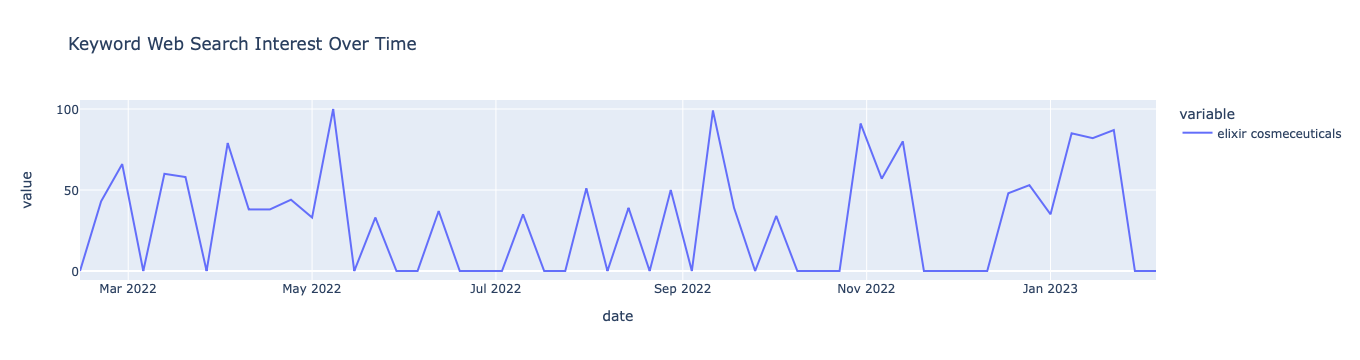

In [166]:
def interest_over_time(keyword):
    
    data = pytrends.interest_over_time() 
    data = data.reset_index() 
    
    kw_list = [keyword] 

    pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='SE')

    import plotly.express as px

    fig = px.line(data, x="date", y=[keyword], title='Keyword Web Search Interest Over Time')
    fig.show()

interest_over_time(keyword)

**Related keywords

In [167]:
data  = pytrends.related_queries()

data[keyword]['top']

,query,value
0,elixir cosmeceuticals niactil 4,100


**Suggested keywords

In [168]:
import pandas as pd 

keywords = pytrends.suggestions(keyword=keyword)
df = pd.DataFrame(keywords)
print(df)

             mid                             title            type
0  /g/11h105_vxb  Elixir Cosmeceuticals Niactil 4%  Acne treatment
1  /g/11kghh120q   Elixir Cosmeceuticals Sulfactil     Moisturizer
